## This notebook is about scikit-learn libraries

In [29]:
#Importing modules/libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import datasets
from sklearn.model_selection import train_test_split


%matplotlib inline
plt.style.use('dark_background')

# K-Nearest Neighbors Algorithm in Python and Scikit-Learn

[1] K-Nearest Neighbors Algorithm is a type of Supervised Machine learning algorithms. This algorithm uses data for training while classifying a new data point or instance and it doesn't assume anything about the underlying data. It calculates the distance of a new data point to all other training data points and selects the K-nearest data points(K-any integer values). Finally it assigns the data point to the class to which the majority of the K data points belong.

![Image](https://s3.amazonaws.com/stackabuse/media/k-nearest-neighbors-algorithm-python-scikit-learn-1.png)


![Image](https://s3.amazonaws.com/stackabuse/media/k-nearest-neighbors-algorithm-python-scikit-learn-2.png)

[1] Suppose a dataset with two variables generates the above plot. classify a new data point with 'X' into "Blue" class or "Red" class. The coordinate values of the data point are x=45 and y=50. Suppose the value of K is 3. The KNN algorithm starts by calculating the distance of point X from all the points. It then finds the 3 nearest points with least distance to point X. This is shown in the figure below. The three nearest points have been encircled. The final step of the KNN algorithm is to assign new point to the class to which majority of the three nearest points belong. From the figure above we can see that the two of the three nearest points belong to the class "Red" while one belongs to the class "Blue". Therefore the new data point will be classified as "Red".

## Machine learning is the process of teaching a computer system on how to make accurate predictions from the data it is fed.  - Wikipedia

In Machine learning, the model/algorithm has been taught how to perform certain tasks with a huge amount of data. So that whenever the model/algorithm finds a pattern similar to what it is trained on, it performs tasks automatically without external intervention.

Thera are 2 main types of Machine Learning.
1. Supervised learning
2. Unsupervised learning

Supervised learning - Algorithm is trained on a labeled dataset.
Supervised learning is classified into two types - Classification and Regression.

Classification - The samples may belong to two or more classes. Learning from labeled data is key to predict the class of unlabeled data.

Regression - The desired output consists of one or more continous variables.

Scikit-learn is a Python module for machine learning built on top of SciPy. Scikit-learn is used for machine learning such as classification, regression, and clustering algorithms and it works with Python libraries like NumPy and SciPy.

## Linear Regression model

Linear regression model finds relationship between one or more features and continuous target variable and it performs regression task. 
I'm using Diabetes dataset to explore it using Scikit-learn.

The dataset can also be obtained from [here](https://github.com/plotly/datasets/blob/master/diabetes.csv)





In [2]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Loading the dataset

In [3]:
# Load dataset from scikit-learn dataset library

diabetes = datasets.load_diabetes()
print('Dataset shape:',diabetes.data.shape)
print('Diabetes labels shape:',diabetes.target.shape)
print('Diabetes feature names:',diabetes.feature_names)

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
print("###################")
print('Diabetes first rows:',df.head())

Dataset shape: (442, 10)
Diabetes labels shape: (442,)
Diabetes feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
###################
Diabetes first rows:         age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641  


Diabetes dataset consists of a total of 422 samples with 10 features each.
The dataset can be split into the test and train sets using train_test_split function of sklearn.model_selection package.

## Splitting the data

In [4]:
# Split dataset into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=1)

# Import Linear regression module from scikit-learn linear-model package
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# To train the model
model.fit(X_train, y_train)

LinearRegression()

As the training model is complete, for predictions, train set which is not visible by the model and see how accurate our model predicts.

In [5]:
# Predict on new unseen data

y_preds = model.predict(X_test) # Returns predicted labels.

# Evaluate the model using Squared Mean Error
from sklearn.metrics import mean_squared_error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_preds))

Mean squared error: 2992.56


In [6]:
# Compare Actual Labels to the predicted labels

df_res = pd.DataFrame({'Actual': y_test, 'Predicted': y_preds})
df_res

,Actual,Predicted
0,78.0,119.138000
1,152.0,110.773913
2,200.0,185.037535
3,59.0,68.010043
4,311.0,171.055675
...,...,...
84,64.0,113.351181
85,107.0,111.447774
86,49.0,98.357841
87,60.0,73.104863


In [7]:
Y_pred = np.round(model.predict(X_test),2) # predict Y values using the X_test inputs
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f' % mean_squared_error(y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f' % r2_score(y_test, Y_pred))

Coefficients: [ -30.62168241 -272.25451707  528.84444333  327.70269026 -581.01413007
  332.96286278  -27.97606192  139.28448979  665.07521004   61.90596378]
Intercept: 151.43006895898006
Mean squared error (MSE): 2992.49
Coefficient of determination (R^2): 0.44


<AxesSubplot:>

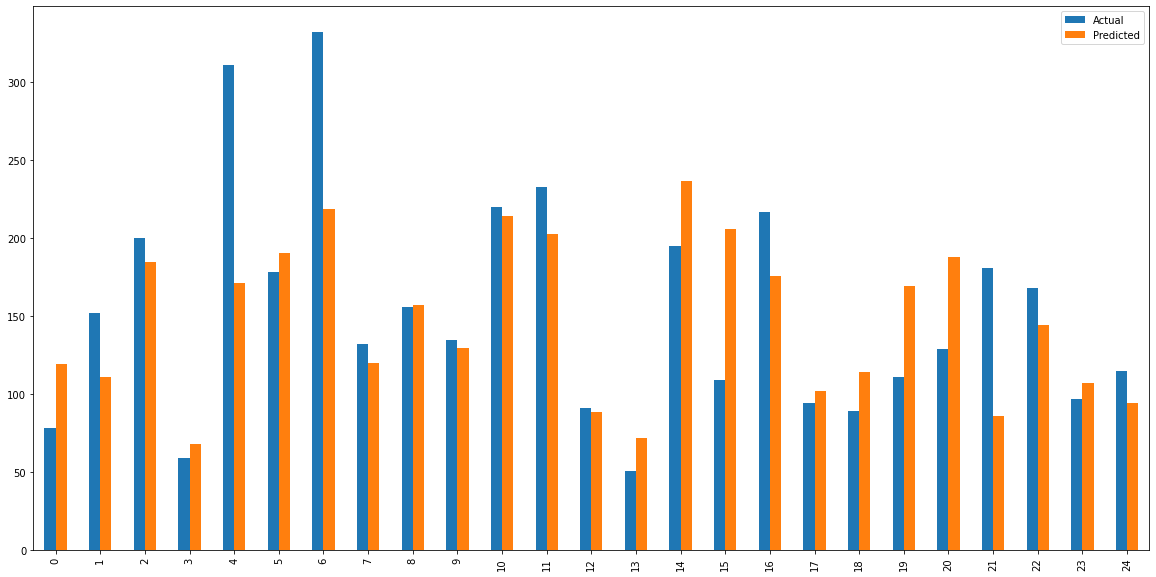

In [8]:
df_head = df_res.head(25)
df_head.plot(kind='bar', figsize=(20,10))

## Red Wine Quality Data Set

 This dataset is available at [Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)
 The dataset contains a total of 12 variables. The purpose of the red wine quality dataset is to predict which of the physiochemical features make good wine. The dataset contains the following features.
 
 1. Alcohol: Amount of Alcohol in wine
 2. pH: level of acidity
 3. Volatile acidity: High acetic acid content which leading to an unpleasant vinegar taste
 4. Fixed Acidity: non-volatile acids that do not evaporate easily
 5. Citric Acid: 
 6. Sulphates
 7. Density
 8. Residual sugar
 9. Chlorides
 10. Free Sulfur Dioxide
 11. Total Sulfur Dioxide
 12. Quality
 
 

In [9]:
wine_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df_wine = pd.read_csv(wine_url, sep=';')
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Checking for null values if there is any

In [10]:
df_wine.info()
df_wine.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [11]:
#descriptive statistics
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
df_wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [14]:
df_wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [15]:
df_wine['quality'].count()

1599

<AxesSubplot:xlabel='quality', ylabel='count'>

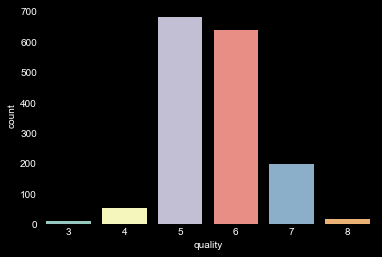

In [30]:
sns.countplot(x='quality', data=df_wine)

<AxesSubplot:>

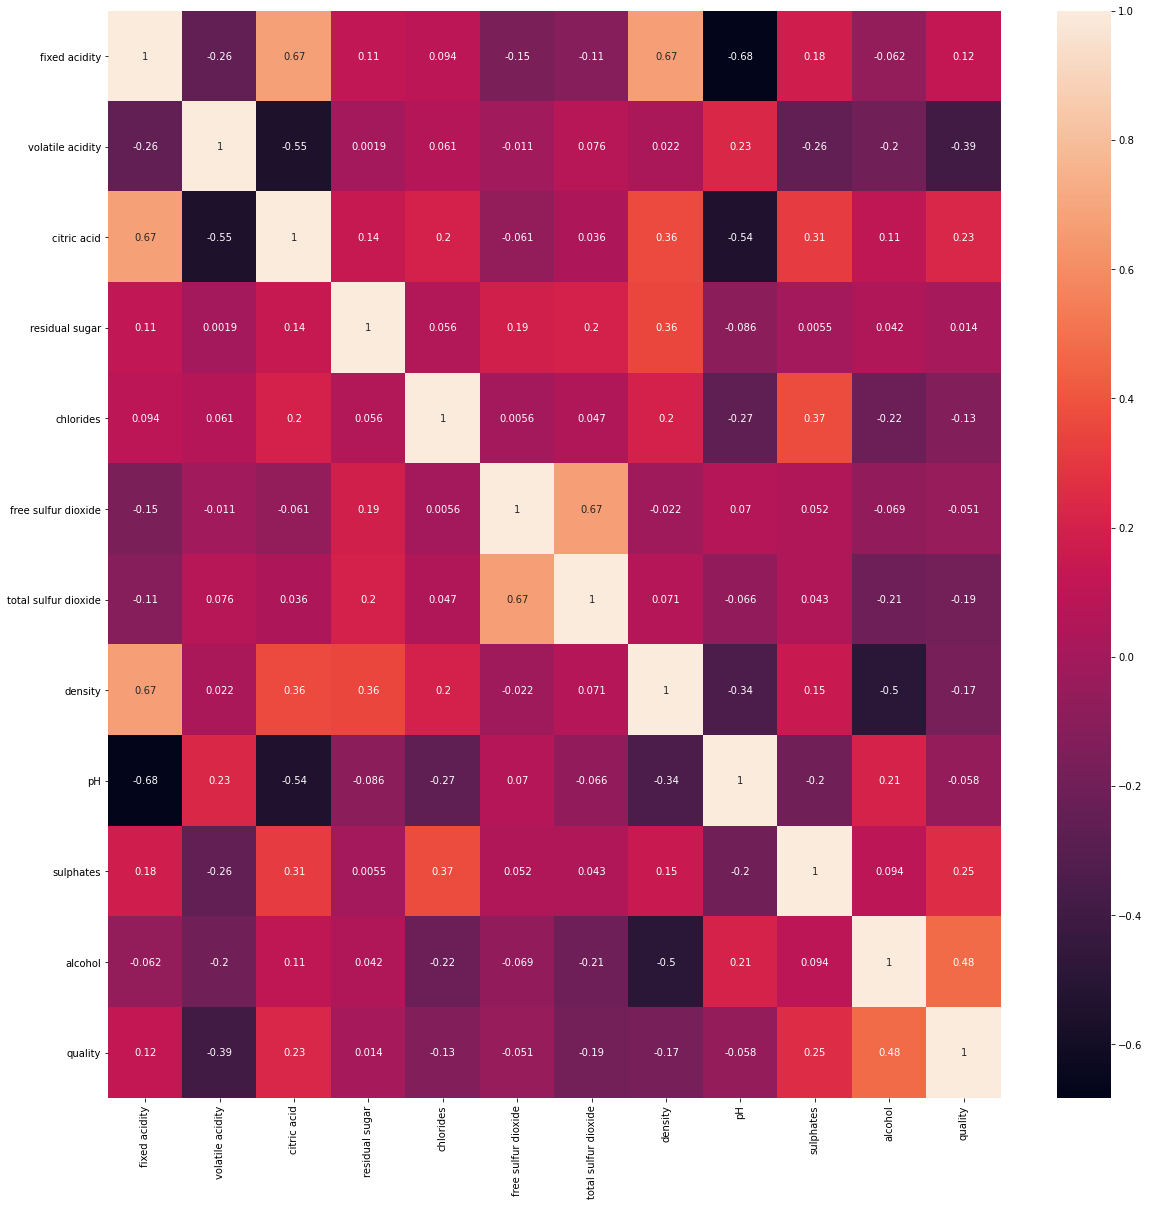

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(df_wine.corr(),annot=True)

# References

1. [K-Nearest Neighbors Algorithm in Python and Scikit-Learn](https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/)

2. [Mastering Markdown](https://guides.github.com/features/mastering-markdown/)

3. [Useful Jupyter Notebook Shortcuts](https://www.earthdatascience.org/courses/intro-to-earth-data-science/open-reproducible-science/jupyter-python/jupyter-notebook-shortcuts/)